<a href="https://colab.research.google.com/github/Marvayo/How-to-implement-an-ML-pipeline/blob/master/Proyecto_Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import io 
from numpy import array
from seaborn import load_dataset
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt


In [34]:
from google.colab import files 
uploaded = files.upload()

Saving documentos.csv to documentos (3).csv


In [35]:
df = pd.read_csv(io.BytesIO(uploaded['documentos.csv'])) 
print(df)

                                             DOCUMENTO    FCH_CREA
0    {\rtf1\ansi\ansicpg1252\uc1\deff1{\fonttbl  {\...  03/01/2007
1    {\rtf1\ansi\ansicpg1252\uc1\deff1{\fonttbl  {\...  23/01/2007
2    {\rtf1\ansi\ansicpg1252\uc1\deff0{\fonttbl  {\...  23/01/2007
3    {\rtf1\ansi\ansicpg1252\uc1\deff1{\fonttbl  {\...  29/01/2007
4    {\rtf1\ansi\ansicpg1252\uc1\deff1{\fonttbl  {\...  29/01/2007
..                                                 ...         ...
234  {\rtf1\ansi\ansicpg1252\uc1\deff1{\fonttbl  {\...  19/06/2007
235  {\rtf1\ansi\ansicpg1252\uc1\deff1{\fonttbl  {\...  19/06/2007
236  {\rtf1\ansi\ansicpg1252\uc1\deff1{\fonttbl  {\...  19/06/2007
237  {\rtf1\ansi\ansicpg1252\uc1\deff1{\fonttbl  {\...  21/06/2007
238  {\rtf1\ansi\ansicpg1252\uc1\deff0{\fonttbl  {\...  21/06/2007

[239 rows x 2 columns]


In [36]:
denuncias=df["DOCUMENTO"].str.upper()#convertir a mayúsculas
fechas=df["FCH_CREA"]#convertir a mayúsculas


denuncias.shape
fechas.shape

(239,)

In [37]:
denuncias=df["DOCUMENTO"].str.upper()#convertir a mayúsculas
denuncias
denuncia1=np.array(denuncias[0].split())

denuncia1.shape
denuncias_palabras={}
for i, denuncia in enumerate(denuncias):#iterando en c/denuncia y reg. de num de iteración
    denuncias_palabras[i]=np.array(denuncia.split())

In [38]:
denuncias_palabras[50].shape
long_max=0
for denuncia in denuncias_palabras.values(): 
    numWords=len(denuncia)
    if long_max<numWords: 
        long_max=numWords
numPalabras=long_max
print(numPalabras)#Es el valor que tendrá cada renglón 

3007


In [39]:
type(denuncias_palabras[0])
len(denuncias_palabras[0])#queremos que esta denuncia tenga la longitud de 3007
denuncia1=denuncias_palabras[0]
nueva_denuncia1=np.append(denuncia1, [1,2,3])
len(nueva_denuncia1)

1508

In [40]:
nuevo_denuncias={}
for i, denuncia in enumerate(denuncias_palabras.values()):
    palabras_agregar=long_max-len(denuncia) 
    
    nuevo_denuncias[i]=np.append(denuncia, palabras_agregar*['b@sur@'])

numRenglones=len(nuevo_denuncias )
print(numRenglones)#0 al 238


239


In [41]:
nuevo_denuncias

{0: array(['{\\RTF1\\ANSI\\ANSICPG1252\\UC1\\DEFF1{\\FONTTBL',
        '{\\F0\\FSWISS\\FCHARSET0\\FPRQ2', 'ARIAL;}', ..., 'b@sur@',
        'b@sur@', 'b@sur@'], dtype='<U187'),
 1: array(['{\\RTF1\\ANSI\\ANSICPG1252\\UC1\\DEFF1{\\FONTTBL',
        '{\\F0\\FSWISS\\FCHARSET0\\FPRQ2', 'ARIAL;}', ..., 'b@sur@',
        'b@sur@', 'b@sur@'], dtype='<U179'),
 2: array(['{\\RTF1\\ANSI\\ANSICPG1252\\UC1\\DEFF0{\\FONTTBL',
        '{\\F0\\FSWISS\\FCHARSET0\\FPRQ2', 'ARIAL;}', ..., 'b@sur@',
        'b@sur@', 'b@sur@'], dtype='<U275'),
 3: array(['{\\RTF1\\ANSI\\ANSICPG1252\\UC1\\DEFF1{\\FONTTBL',
        '{\\F0\\FSWISS\\FCHARSET0\\FPRQ2', 'ARIAL;}', ..., 'b@sur@',
        'b@sur@', 'b@sur@'], dtype='<U179'),
 4: array(['{\\RTF1\\ANSI\\ANSICPG1252\\UC1\\DEFF1{\\FONTTBL',
        '{\\F0\\FSWISS\\FCHARSET0\\FPRQ2', 'ARIAL;}', ..., 'b@sur@',
        'b@sur@', 'b@sur@'], dtype='<U185'),
 5: array(['{\\RTF1\\ANSI\\ANSICPG1252\\UC1\\DEFF1{\\FONTTBL',
        '{\\F0\\FSWISS\\FCHARSET0\\FPRQ2', 'ARIAL;}'

In [42]:
#tarea 
#1. El dataframe que está arriba llamada denuncias_procesadas, en las columnas que van del 0 al 3007, tenemos texto,
#se desea hacer integer para cada palabra 

#nuevo_denuncias

In [43]:
lista=[]
 
for key, value in nuevo_denuncias.items():
  for palabra in value:
    lista.append(palabra)
print(len(lista) )

718673


In [44]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(lista)

print(integer_encoded.shape)
print(integer_encoded)

(718673,)
[8695 8664 1000 ... 8658 8658 8658]


In [45]:
numRenglones#numero de renglones 0 - 238
numPalabras # numero de palabras más la de cada termino 
integer_encoded 

nuevaMatriz=integer_encoded.reshape(numRenglones, numPalabras)
print(nuevaMatriz)

arr = np.array([1,2,3,4,5])
np.delete(arr, 1)

[[8695 8664 1000 ... 8658 8658 8658]
 [8695 8664 1000 ... 8658 8658 8658]
 [8694 8664 1000 ... 8658 8658 8658]
 ...
 [8695 8664 1000 ... 8658 8658 8658]
 [8695 8664 1000 ... 8658 8658 8658]
 [8694 8664 1000 ... 8658 8658 8658]]


array([1, 3, 4, 5])

In [46]:
nuevaMatriz
listOfKeys = nuevo_denuncias.keys()


nuevo_denunciasInteger=dict(zip(listOfKeys, nuevaMatriz))

print(nuevo_denunciasInteger)


{0: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 1: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 2: array([8694, 8664, 1000, ..., 8658, 8658, 8658]), 3: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 4: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 5: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 6: array([8694, 8664, 1000, ..., 8658, 8658, 8658]), 7: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 8: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 9: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 10: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 11: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 12: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 13: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 14: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 15: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 16: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 17: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 18: array([8695, 8664, 1000, ..., 865

In [47]:
TrainDF=pd.DataFrame(nuevo_denunciasInteger).transpose()


In [48]:
fechas=fechas.astype("category")
objetivo=fechas.cat.codes
num_classes=len(objetivo.unique())#saber cuantas fechas diferentes existen 72
TrainDF.shape


(239, 3007)

In [49]:
def build_model(num_classes=num_classes, hidden_layers=1, units=128, data_shape=TrainDF.shape[1:]):
    model = tf.keras.Sequential()#
    # input layer
    model.add(tf.keras.layers.InputLayer(input_shape=list(data_shape)))#define el input 
    # MLP required shape
   # model.add(tf.keras.layers.Flatten())
    
    #hidden layer(s)
    for hidden_layer in range(1,hidden_layers+1):
        model.add(tf.keras.layers.Dense(units, activation='relu'))
        
    #output layer
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax')) 
    #model.add(tf.keras.layers.Dense(num_classes, activation='softmax', kernel_regularizer=tf.keras.regularizers.L2(0.1))) 
    
    loss=tf.keras.losses.SparseCategoricalCrossentropy() 
    metrics=['accuracy']
    optimizer=tf.keras.optimizers.Adam()
    
    model.compile(loss=loss, metrics=metrics, optimizer=optimizer)
    
    return model

In [50]:
model = build_model()
# Verify that the network is as you imagined
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               385024    
                                                                 
 dense_3 (Dense)             (None, 72)                9288      
                                                                 
Total params: 394,312
Trainable params: 394,312
Non-trainable params: 0
_________________________________________________________________


In [51]:
n=len(TrainDF)
train_images=TrainDF[:int(n*.9)]
train_labels=objetivo[:int(n*.9)]
validation_images=TrainDF[int(n*.9):]
validation_labels=objetivo[int(n*.9):]

In [52]:
train_images

,0,1,2,3,4,5,6,7,8,9,...,2997,2998,2999,3000,3001,3002,3003,3004,3005,3006
0,8695,8664,1000,8665,7848,5620,7157,8669,7670,8661,...,8658,8658,8658,8658,8658,8658,8658,8658,8658,8658
1,8695,8664,1000,8665,7848,5620,7157,8669,7670,8663,...,8658,8658,8658,8658,8658,8658,8658,8658,8658,8658
2,8694,8664,1000,8665,7848,5620,7157,8669,7670,8663,...,8658,8658,8658,8658,8658,8658,8658,8658,8658,8658
3,8695,8664,1000,8665,7848,5620,7157,8669,7670,8663,...,8658,8658,8658,8658,8658,8658,8658,8658,8658,8658
4,8695,8664,1000,8665,7848,5620,7157,8669,7670,8663,...,8658,8658,8658,8658,8658,8658,8658,8658,8658,8658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,8695,8664,1000,8665,7848,5620,7157,8669,7670,8663,...,8658,8658,8658,8658,8658,8658,8658,8658,8658,8658
211,8695,8664,1000,8665,7848,5620,7157,8669,7670,8661,...,8658,8658,8658,8658,8658,8658,8658,8658,8658,8658
212,8695,8664,1000,8665,7848,5620,7157,8669,7670,8663,...,8658,8658,8658,8658,8658,8658,8658,8658,8658,8658
213,8695,8664,1000,8665,7848,5620,7157,8670,7691,8672,...,8658,8658,8658,8658,8658,8658,8658,8658,8658,8658


In [53]:
history = model.fit(train_images, train_labels, epochs=30, batch_size=32, validation_data=(validation_images, validation_labels))

Epoch 1/30
7/7 [==============================] - 1s 32ms/step - loss: 35516.0273 - accuracy: 0.0186 - val_loss: 31704.5312 - val_accuracy: 0.0417
Epoch 2/30
7/7 [==============================] - 0s 11ms/step - loss: 26961.6992 - accuracy: 0.0140 - val_loss: 14063.0830 - val_accuracy: 0.0833
Epoch 3/30
7/7 [==============================] - 0s 9ms/step - loss: 16105.0547 - accuracy: 0.0140 - val_loss: 9207.9326 - val_accuracy: 0.0000e+00
Epoch 4/30
7/7 [==============================] - 0s 11ms/step - loss: 8717.6006 - accuracy: 0.0698 - val_loss: 5906.1406 - val_accuracy: 0.0417
Epoch 5/30
7/7 [==============================] - 0s 8ms/step - loss: 4150.6855 - accuracy: 0.0419 - val_loss: 1028.0571 - val_accuracy: 0.0000e+00
Epoch 6/30
7/7 [==============================] - 0s 9ms/step - loss: 191.8976 - accuracy: 0.0279 - val_loss: 4.2840 - val_accuracy: 0.0000e+00
Epoch 7/30
7/7 [==============================] - 0s 10ms/step - loss: 5.4855 - accuracy: 0.0140 - val_loss: 4.2861 - va

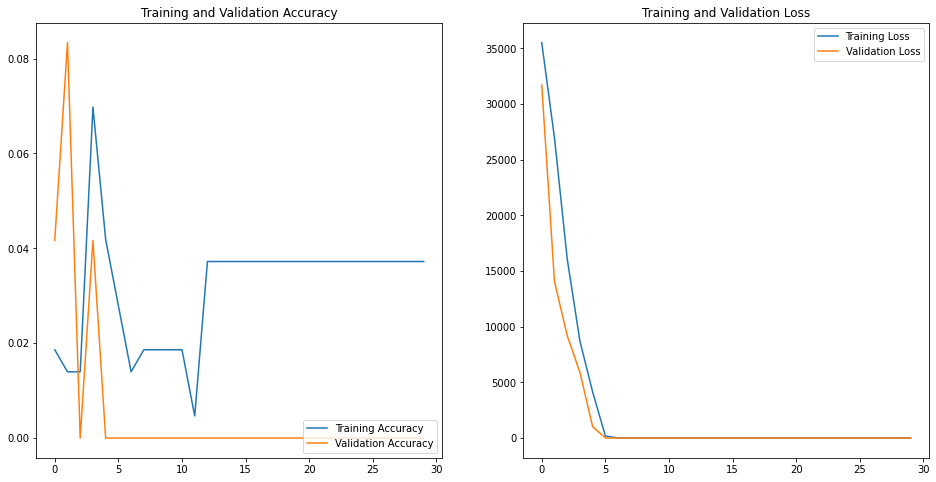

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()